In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from datetime import datetime
from delorean import Delorean

In [210]:
ls data/ #

EOD.csv*             EOD_filtered         columns_headers.txt*


## Load and format dataframe

In [211]:
def store_EOD_batch(filename):

    # Load the csv downloaded from accessing
    # https://www.quandl.com/api/v3/databases/EOD/data?auth_token=XyhQVHcxGCzFqirass27
        
    batch = pd.read_csv(filename, names=['Ticker', 
                                         'Date', 
                                         'Open',
                                         'High', 
                                         'Low', 
                                         'Close', 
                                         'Volume', 
                                         'Dividends', 
                                         'Splits', 
                                         'Adjusted Open', 
                                         'Adjusted High', 
                                         'Adjusted Low', 
                                         'Adjusted Close', 
                                         'Adjusted Volume'], 
                                  parse_dates=True)

    return batch

In [212]:
df = store_EOD_batch('data/EOD.csv')

In [213]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24309215 entries, 0 to 24309214
Data columns (total 14 columns):
Ticker             object
Date               object
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
Dividends          float64
Splits             float64
Adjusted Open      float64
Adjusted High      float64
Adjusted Low       float64
Adjusted Close     float64
Adjusted Volume    float64
dtypes: float64(12), object(2)
memory usage: 2.7+ GB


In [214]:
type(df['Date'])
type(df['Date'][0]) #Looks like your dates are coming out as strings

str

In [215]:
df['Date'] = pd.to_datetime(df['Date']) #Converting to datetime
#Note: This is worth looking at- http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [216]:
df['Ticker'] = df['Ticker'].astype('category') #Categories are a more efficient datatype

In [217]:
df.info() #Note changed Ticker and Date columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24309215 entries, 0 to 24309214
Data columns (total 14 columns):
Ticker             category
Date               datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
Dividends          float64
Splits             float64
Adjusted Open      float64
Adjusted High      float64
Adjusted Low       float64
Adjusted Close     float64
Adjusted Volume    float64
dtypes: category(1), datetime64[ns](1), float64(12)
memory usage: 2.6 GB


In [218]:
df.head() #

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900,0,1,29.928206,32.888139,26.310511,28.941562,44739900
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100,0,1,28.243481,28.282945,26.184745,26.559659,10897100
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200,0,1,27.172180,28.941562,26.349977,28.941562,4705200
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400,0,1,27.960462,28.703881,26.480202,26.480202,4274400
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400,0,1,26.399839,27.590561,26.314317,27.011646,3464400


In [219]:
df.shape #

(24309215, 14)

In [220]:
df.describe() #Not super informative, in aggregate

,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
count,24304284.000000,2.430749e+07,24307472.000000,24309215.000000,2.430770e+07,24309215.000000,24309215.000000,2.430428e+07,2.430749e+07,2.430747e+07,2.430922e+07,2.430770e+07
mean,48.529812,1.203196e+02,48.018308,48.514966,8.629172e+05,0.005307,1.000137,1.135979e+05,1.265823e+05,9.978885e+04,1.098725e+05,1.000794e+06
std,1545.430676,2.228532e+05,1533.497113,1544.535929,7.511551e+06,16.789471,0.020752,6.607799e+07,1.032253e+08,4.406455e+07,6.284033e+07,6.004449e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.001667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.250000,9.380000e+00,9.060000,9.240000,1.120000e+04,0.000000,1.000000,5.300000e+00,5.393217e+00,5.205000e+00,5.300000e+00,1.115700e+04
50%,18.885000,1.912000e+01,18.620000,18.880000,7.150000e+04,0.000000,1.000000,1.208582e+01,1.226000e+01,1.190403e+01,1.208405e+01,7.957900e+04
75%,34.480000,3.488000e+01,34.000000,34.480000,3.620000e+05,0.000000,1.000000,2.540000e+01,2.568609e+01,2.510060e+01,2.540000e+01,4.495000e+05
max,228180.000000,7.922000e+08,227530.310000,229300.000000,6.674913e+09,82776.000000,50.000000,2.092500e+11,4.050000e+11,1.012500e+11,2.092500e+11,2.304019e+09


### Column 'Ticker'


In [221]:
df['Ticker'].describe() #Turns out there are 8936 companies

count     24309215
unique        8936
top            IBM
freq         13488
Name: Ticker, dtype: object

In [222]:
df['Ticker'].value_counts() #Most and least-represented companies

IBM    13488
DIS    13488
CAT    13488
GE     13488
KO     13488
DD     13487
BA     13487
AA     13487
HPQ    13487
FL     11502
GT     11501
DTE    11501
MRK    11501
MO     11501
PG     11501
...
CBX           1
GPIAW         1
HEWW          1
EACQU         1
IFAN          1
FVI           1
CTZ_P_A_CL    1
PRSNW         1
BTX_WS_W      1
QRMLF         1
TGNA_W        1
HACW          1
GPACU         1
EMBH          1
JBJ_CL        1
Length: 8936, dtype: int64

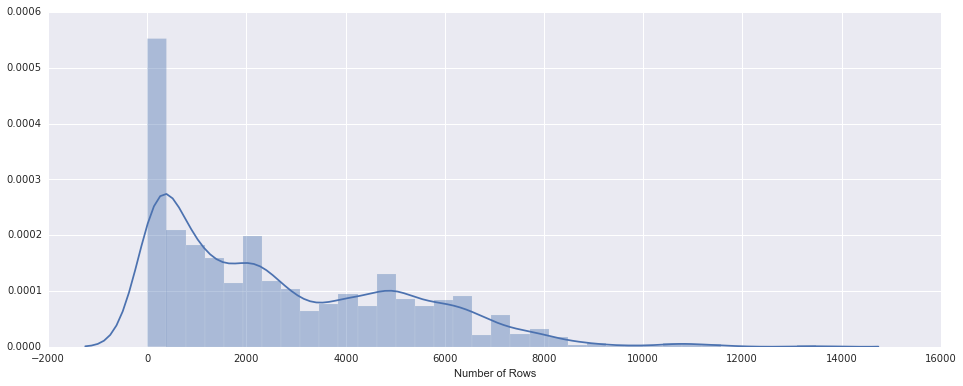

In [223]:
sns.set(rc={"figure.figsize": (16, 6)})
sns.distplot(df['Ticker'].value_counts(), axlabel="Number of Rows") #Distribution of company data
#Looks like there are a lot of companies with little data.
#They can probably be filtered out.

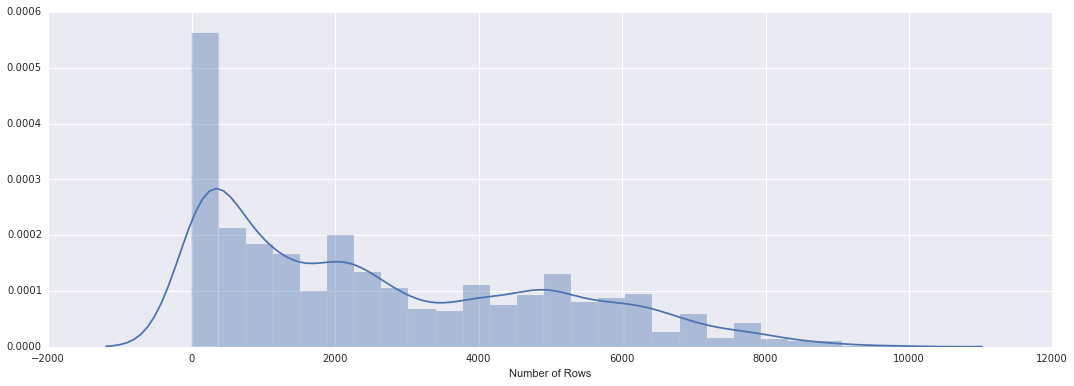

In [224]:
#High pass filter so we can get a better look:
sns.set(rc={"figure.figsize": (18, 6)})
ticker_mask = df['Ticker'].value_counts() <= 10000
ticker_counts = df['Ticker'].value_counts()[ticker_mask]
sns.distplot(ticker_counts, axlabel="Number of Rows")

In [225]:
min(df['Date']) #Earliest stock is in 1962, apparently

Timestamp('1962-01-02 00:00:00')

## Filtering out unwanted data

In [226]:
# Restricting to stocks since 2000
df = df[df['Date'] > datetime(2000, 1, 1)]

In [227]:
df.shape

(18988946, 14)

In [228]:
24309215 - df.shape[0] #Looks like we shaved off only about 5.3 million rows

5320269

In [229]:
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
30,A,2000-01-03,78.75,78.94,67.38,72.00,3343600,0,1,51.805952,51.930944,44.326160,47.365442,3343600
31,A,2000-01-04,68.13,68.88,64.75,66.50,3408500,0,1,44.814547,45.307882,42.591251,43.742366,3408500
32,A,2000-01-05,66.25,66.31,61.31,61.56,4119200,0,1,43.575932,43.615397,40.326647,40.491085,4119200
33,A,2000-01-06,61.63,62.00,58.13,60.00,1812900,0,1,40.538590,40.781966,38.236382,39.466419,1812900
34,A,2000-01-07,59.06,65.94,59.00,65.00,2016900,0,1,38.851914,43.377840,38.812444,42.759472,2016900


In [230]:
df.tail()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
24309210,ZXYZ_A,2015-03-17,10.0,10.00,10.0,10.0,200,0,1,10.0,10.00,10.0,10.0,200
24309211,ZXYZ_A,2015-03-20,10.0,10.00,10.0,10.0,100,0,1,10.0,10.00,10.0,10.0,100
24309212,ZZK,2015-07-16,100.0,100.00,100.0,100.0,0,0,1,100.0,100.00,100.0,100.0,0
24309213,ZZZ,2015-07-16,0.5,0.50,0.5,0.5,0,0,1,0.5,0.50,0.5,0.5,0
24309214,ZZZ,2015-07-17,1.0,1.01,1.0,1.0,1000,0,1,1.0,1.01,1.0,1.0,1000


In [231]:
df['Ticker'].value_counts() < 100

VBF     False
FL      False
NTAP    False
FCH     False
MMC     False
EVF     False
LOAN    False
WOR     False
AP      False
INTU    False
CVS     False
PULB    False
FLIC    False
DCI     False
RE      False
...
CBX           True
GPIAW         True
HEWW          True
EACQU         True
IFAN          True
FVI           True
CTZ_P_A_CL    True
PRSNW         True
BTX_WS_W      True
QRMLF         True
TGNA_W        True
HACW          True
GPACU         True
EMBH          True
JBJ_CL        True
Length: 8936, dtype: bool

In [232]:
sum(df['Ticker'].value_counts() < 100) #

544

In [233]:
df['Ticker'].value_counts().describe() #

count    8936.000000
mean     2124.993957
std      1516.269911
min         1.000000
25%       545.000000
50%      2079.000000
75%      3918.000000
max      3920.000000
dtype: float64

In [234]:
sum(df['Ticker'].value_counts() < 50) #

397

In [235]:
#Gonna drop tickers with less than 100 days of trading
df['Ticker'].value_counts().index

Index([u'VBF', u'FL', u'NTAP', u'FCH', u'MMC', u'EVF', u'LOAN', u'WOR', u'AP', u'INTU', u'CVS', u'PULB', u'FLIC', u'DCI', u'RE', u'A', u'RCS', u'RCII', u'RCI', u'RCG', u'DDF', u'RELV', u'REGN', u'REIS', u'DDS', u'REXI', u'RF', u'RFI', u'RFIL', u'DAKT', u'D', u'RGLD', u'CZNC', u'DDR', u'RBC', u'DE', u'DEL', u'DNP', u'DNI', u'DNB', u'DMF', u'DJCO', u'QQQ', u'DIS', u'DIN', u'QSII', u'DIA', u'DHY', u'DHR', u'DHF', u'DGX', u'QUMU', u'DGAS', u'RAI', u'RAS', u'DEST', u'RAVN', u'RBA', u'RIG', u'RBCAA', u'RHP', u'RJF', u'CYD', u'CSCO', u'RTN', u'CTBI', u'CTB', u'CSX', u'CSS', u'RVSB', u'RWC', u'RWT', u'CSI', u'CSGS', u'RY', u'RYL', u'CTL', u'RYN', u'CSC', u'CRY', u'SAH', u'SALM', u'CRVP', u'SAN', u'CRV', u'CRT', u'CRR', u'SBGI', u'CTG', u'RSG', u'CYBE', u'CVR', u'CY', u'QCOM', u'CXW', u'RL', u'CXH', u'CXE', u'RLI', u'CWCO', ...], dtype='object')

In [236]:
under100 = df['Ticker'].value_counts() < 100

In [237]:
under100 = under100[under100==True]

In [238]:
low_pass = df['Ticker'].isin(under100.index)
df = df[~low_pass]

In [239]:
df.shape

(18970632, 14)

In [240]:
18988946 - df.shape[0] #Dropped tiny/new companies

18314

In [241]:
df.tail()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
24309204,ZX,2015-07-24,0.8399,0.8399,0.78,0.80,55292,0,1,0.8399,0.8399,0.78,0.80,55292
24309205,ZX,2015-07-27,0.8200,0.8600,0.78,0.78,9501,0,1,0.8200,0.8600,0.78,0.78,9501
24309206,ZX,2015-07-28,0.7980,0.8900,0.79,0.89,7548,0,1,0.7980,0.8900,0.79,0.89,7548
24309207,ZX,2015-07-29,0.8300,0.8500,0.83,0.85,3231,0,1,0.8300,0.8500,0.83,0.85,3231
24309208,ZX,2015-07-30,0.7845,0.8700,0.77,0.78,30414,0,1,0.7845,0.8700,0.77,0.78,30414


In [242]:
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Splits,Adjusted Open,Adjusted High,Adjusted Low,Adjusted Close,Adjusted Volume
30,A,2000-01-03,78.75,78.94,67.38,72.00,3343600,0,1,51.805952,51.930944,44.326160,47.365442,3343600
31,A,2000-01-04,68.13,68.88,64.75,66.50,3408500,0,1,44.814547,45.307882,42.591251,43.742366,3408500
32,A,2000-01-05,66.25,66.31,61.31,61.56,4119200,0,1,43.575932,43.615397,40.326647,40.491085,4119200
33,A,2000-01-06,61.63,62.00,58.13,60.00,1812900,0,1,40.538590,40.781966,38.236382,39.466419,1812900
34,A,2000-01-07,59.06,65.94,59.00,65.00,2016900,0,1,38.851914,43.377840,38.812444,42.759472,2016900


## Now dropping to:
* Open price average above 10
* Average volume above 15K

In [243]:
grouped = df.groupby('Ticker')

In [244]:
means = grouped.agg(np.mean)

In [245]:
cleaned_means = means[~(np.isnan(means['Open']))] #Drop companies that don't have usable data

In [246]:
within_range = (cleaned_means['Open'] > 10) & (cleaned_means['Volume'] > 15000)

In [247]:
filtered_df = cleaned_means[within_range]

In [248]:
filtered_df.shape #Looks like there are 5150 companies that make the cut

(5150, 12)

In [249]:
df = df[df['Ticker'].isin(filtered_df.index)]

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343384 entries, 30 to 24308148
Data columns (total 14 columns):
Ticker             category
Date               datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
Dividends          float64
Splits             float64
Adjusted Open      float64
Adjusted High      float64
Adjusted Low       float64
Adjusted Close     float64
Adjusted Volume    float64
dtypes: category(1), datetime64[ns](1), float64(12)
memory usage: 1.3 GB


In [251]:
df.shape

(12343384, 14)

In [252]:
#Writing to another file so I can work without loading the whole damn thing into memory
df.to_csv('data/EOD_filtered.csv')

In [253]:
!ls data

EOD.csv             EOD_filtered        EOD_filtered.csv    columns_headers.txt
